In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Train

In [ ]:
tr_data=pd.read_csv('/content/train_ctrUa4K.csv')

In [ ]:
tr_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
tr_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
tr_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
for i in['Gender','Married','Dependents','Self_Employed']:
  tr_data[i]=tr_data[i].fillna(tr_data[i].mode)

In [ ]:
for i in['LoanAmount','Loan_Amount_Term','Credit_History']:
  tr_data[i]=tr_data[i].fillna(tr_data[i].median())

In [ ]:
tr_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()


In [ ]:
for col in tr_data.columns:
  if tr_data[col].dtype=='object':
    tr_data[col]=label_encoder.fit_transform(tr_data[col].astype(str))

EDA

In [ ]:
tr_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,2,1,0,0,1,5849,0.0,128.0,360.0,1.0,2,1
1,1,2,2,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,2,2,2,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,3,2,2,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1
4,4,2,1,0,0,1,6000,0.0,141.0,360.0,1.0,2,1


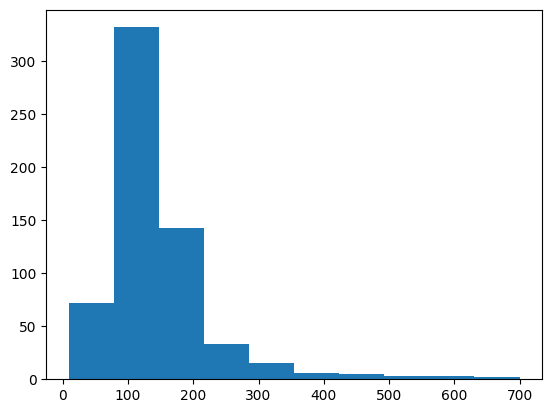

In [ ]:
plt.hist(tr_data['LoanAmount'])
plt.show()

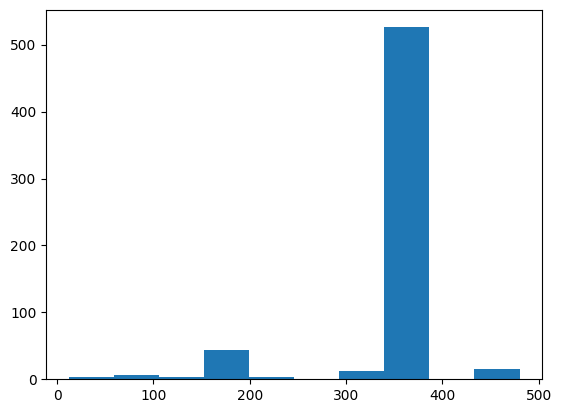

In [ ]:
plt.hist(tr_data['Loan_Amount_Term'])
plt.show()

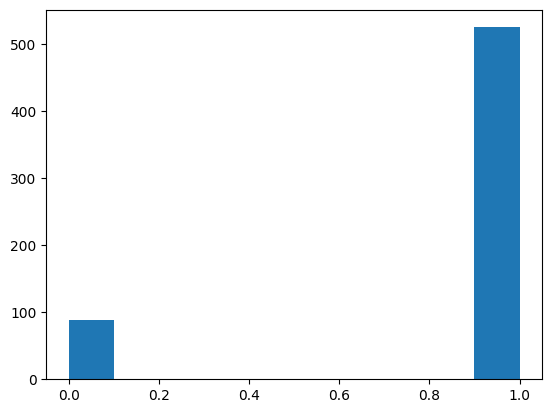

In [ ]:
plt.hist(tr_data['Credit_History'])
plt.show()

<Axes: >

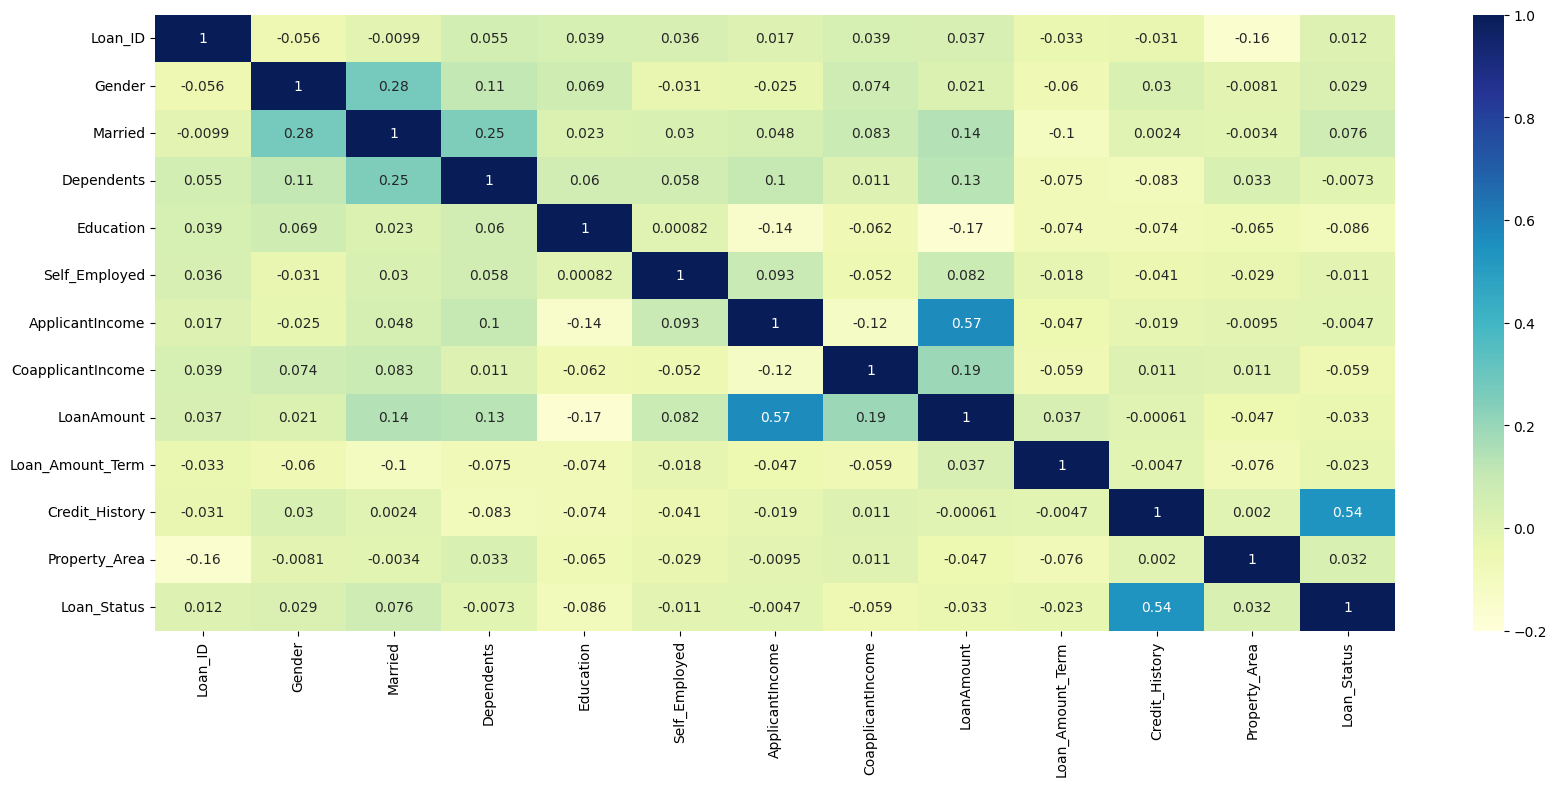

In [ ]:
corrmatrix=tr_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmin=-0.2,vmax=1,cmap='YlGnBu')

In [ ]:
tr_data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,1.775244,1.643322,0.842020,0.218241,1.081433,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.465767,0.489511,1.120531,0.413389,0.423472,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,2.000000,1.000000,0.000000,0.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,2.000000,2.000000,0.000000,0.000000,1.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,2.000000,2.000000,2.000000,0.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


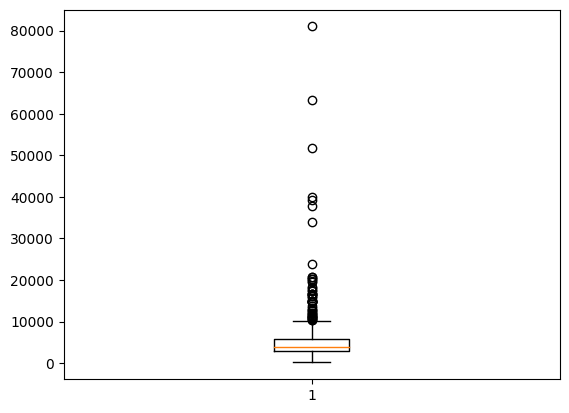

In [ ]:
plt.boxplot(tr_data['ApplicantIncome'])
plt.show()

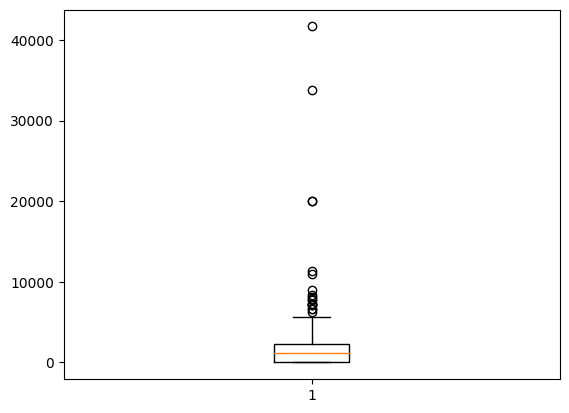

In [ ]:
plt.boxplot(tr_data['CoapplicantIncome'])
plt.show()

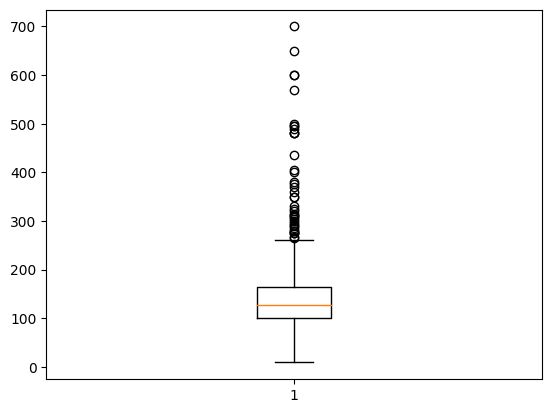

In [ ]:
plt.boxplot(tr_data['LoanAmount'])
plt.show()

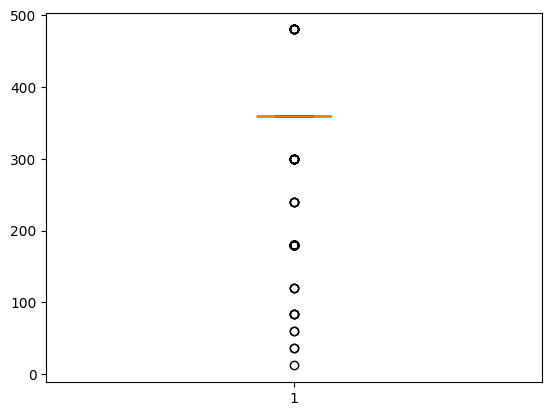

In [ ]:
plt.boxplot(tr_data['Loan_Amount_Term'])
plt.show()

In [ ]:
def find_boundaries(df,variables):
  q1=df[variables].quantile(.25)
  q3=df[variables].quantile(.75)
  IQR=q3-q1
  lower_boundary=q1-1.5*IQR
  upper_boundary=q3+1.5*IQR
  return lower_boundary,upper_boundary

In [ ]:
lower_app,upper_app=find_boundaries(tr_data,'ApplicantIncome')
print('upper Applicant is', upper_app)
print('lower Applicant is', lower_app)


upper Applicant is 10171.25
lower Applicant is -1498.75


In [ ]:
tr_data['ApplicantIncome']=np.where(tr_data['ApplicantIncome']>upper_app,upper_app,np.where(tr_data['ApplicantIncome']<lower_app,lower_app,tr_data['ApplicantIncome']))

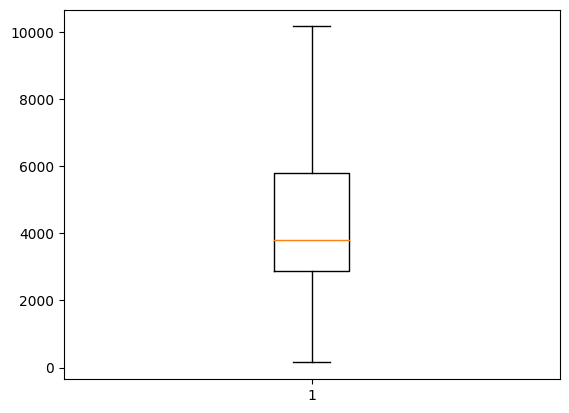

In [ ]:
plt.boxplot(tr_data['ApplicantIncome'])
plt.show()

In [ ]:
tr_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,2,1,0,0,1,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,2,2,1,0,1,4583.0,1508.0,128.0,360.0,1.0,0,0
2,2,2,2,0,0,2,3000.0,0.0,66.0,360.0,1.0,2,1
3,3,2,2,0,1,1,2583.0,2358.0,120.0,360.0,1.0,2,1
4,4,2,1,0,0,1,6000.0,0.0,141.0,360.0,1.0,2,1


In [ ]:
tr_data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,1.775244,1.643322,0.842020,0.218241,1.081433,4617.111564,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.465767,0.489511,1.120531,0.413389,0.423472,2479.851729,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,2.000000,1.000000,0.000000,0.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,2.000000,2.000000,0.000000,0.000000,1.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,2.000000,2.000000,2.000000,0.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,10171.250000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [ ]:
lower_Coapp,upper_Coapp=find_boundaries(tr_data,'CoapplicantIncome')
print('upper Coapplicant is', upper_Coapp)
print('lower Coapplicant is', lower_Coapp)


upper Coapplicant is 5743.125
lower Coapplicant is -3445.875


In [ ]:
tr_data['CoapplicantIncome']=np.where(tr_data['CoapplicantIncome']>upper_Coapp,upper_Coapp,np.where(tr_data['CoapplicantIncome']<lower_Coapp,lower_Coapp,tr_data['CoapplicantIncome']))

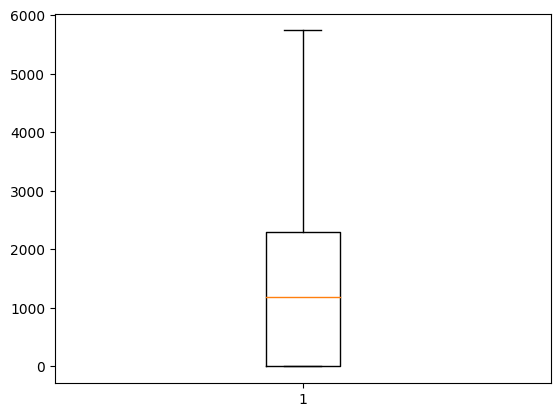

In [ ]:
plt.boxplot(tr_data['CoapplicantIncome'])
plt.show()

In [ ]:
lower_loan,upper_loan=find_boundaries(tr_data,'LoanAmount')
print('upper Loan is', upper_loan)
print('lower Loan is', lower_loan)


upper Loan is 261.5
lower Loan is 3.5


In [ ]:
tr_data['LoanAmount']=np.where(tr_data['LoanAmount']>upper_loan,upper_loan,np.where(tr_data['LoanAmount']<lower_loan,lower_loan,tr_data['LoanAmount']))

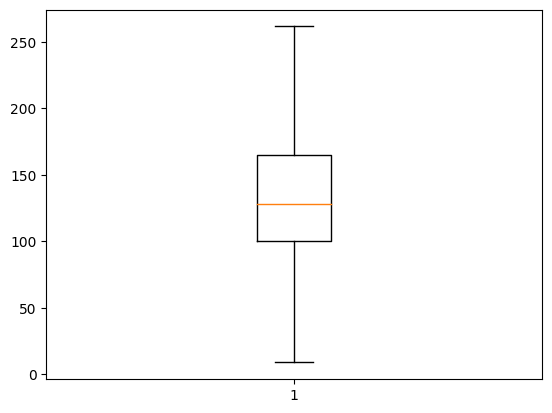

In [ ]:
plt.boxplot(tr_data['LoanAmount'])
plt.show()

In [ ]:
lower_loan_term,upper_loan_term=find_boundaries(tr_data,'Loan_Amount_Term')
print('upper Loan term is', upper_loan_term)
print('lower Loan term is', lower_loan_term)


upper Loan term is 360.0
lower Loan term is 360.0


In [ ]:
tr_data['Loan_Amount_Term']=np.where(tr_data['Loan_Amount_Term']>upper_loan_term,upper_loan_term,np.where(tr_data['Loan_Amount_Term']<lower_loan_term,lower_loan_term,tr_data['Loan_Amount_Term']))

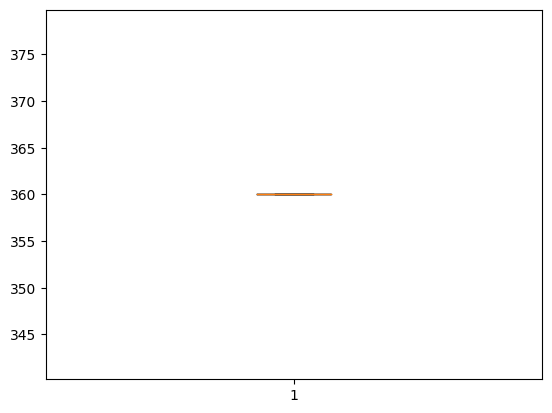

In [ ]:
plt.boxplot(tr_data['Loan_Amount_Term'])
plt.show()

In [ ]:
tr_data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.0,614.000000,614.000000,614.000000
mean,306.500000,1.775244,1.643322,0.842020,0.218241,1.081433,4617.111564,1419.702231,137.365635,360.0,0.855049,1.037459,0.687296
std,177.390811,0.465767,0.489511,1.120531,0.413389,0.423472,2479.851729,1624.605892,55.779749,0.0,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,360.0,0.000000,0.000000,0.000000
25%,153.250000,2.000000,1.000000,0.000000,0.000000,1.000000,2877.500000,0.000000,100.250000,360.0,1.000000,0.000000,0.000000
50%,306.500000,2.000000,2.000000,0.000000,0.000000,1.000000,3812.500000,1188.500000,128.000000,360.0,1.000000,1.000000,1.000000
75%,459.750000,2.000000,2.000000,2.000000,0.000000,1.000000,5795.000000,2297.250000,164.750000,360.0,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,10171.250000,5743.125000,261.500000,360.0,1.000000,2.000000,1.000000


In [ ]:
tr1_data=tr_data.drop('Loan_ID',axis=1)

In [ ]:
tr1_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,1,0,0,1,5849.0,0.0,128.0,360.0,1.0,2,1
1,2,2,1,0,1,4583.0,1508.0,128.0,360.0,1.0,0,0
2,2,2,0,0,2,3000.0,0.0,66.0,360.0,1.0,2,1
3,2,2,0,1,1,2583.0,2358.0,120.0,360.0,1.0,2,1
4,2,1,0,0,1,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,0,1,2900.0,0.0,71.0,360.0,1.0,0,1
610,2,2,3,0,1,4106.0,0.0,40.0,360.0,1.0,0,1
611,2,2,1,0,1,8072.0,240.0,253.0,360.0,1.0,2,1
612,2,2,2,0,1,7583.0,0.0,187.0,360.0,1.0,2,1


In [ ]:
x=tr1_data.drop('Loan_Status',axis=1)
y=tr1_data['Loan_Status']

In [ ]:
x1 = x.drop(['Gender','Married','Dependents',	'Education','Self_Employed','Loan_Amount_Term',	'Credit_History',	'Property_Area'],axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(0,1))
x1 = min_max_scaler.fit_transform(x1)
x1

array([[0.56869153, 0.        , 0.47128713],
       [0.44235999, 0.26257482, 0.47128713],
       [0.28439566, 0.        , 0.22574257],
       ...,
       [0.79052014, 0.0417891 , 0.96633663],
       [0.74172384, 0.        , 0.7049505 ],
       [0.44235999, 0.        , 0.49108911]])

In [ ]:
x1=pd.DataFrame(x1,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'])

In [ ]:
x2=x.drop(['ApplicantIncome',	'CoapplicantIncome','LoanAmount'],axis=1)
x2

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,2,1,0,0,1,360.0,1.0,2
1,2,2,1,0,1,360.0,1.0,0
2,2,2,0,0,2,360.0,1.0,2
3,2,2,0,1,1,360.0,1.0,2
4,2,1,0,0,1,360.0,1.0,2
...,...,...,...,...,...,...,...,...
609,1,1,0,0,1,360.0,1.0,0
610,2,2,3,0,1,360.0,1.0,0
611,2,2,1,0,1,360.0,1.0,2
612,2,2,2,0,1,360.0,1.0,2


In [ ]:
x3=pd.concat([x2,x1],axis=1)
x3

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount
0,2,1,0,0,1,360.0,1.0,2,0.568692,0.000000,0.471287
1,2,2,1,0,1,360.0,1.0,0,0.442360,0.262575,0.471287
2,2,2,0,0,2,360.0,1.0,2,0.284396,0.000000,0.225743
3,2,2,0,1,1,360.0,1.0,2,0.242784,0.410578,0.439604
4,2,1,0,0,1,360.0,1.0,2,0.583760,0.000000,0.522772
...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,0,1,360.0,1.0,0,0.274417,0.000000,0.245545
610,2,2,3,0,1,360.0,1.0,0,0.394761,0.000000,0.122772
611,2,2,1,0,1,360.0,1.0,2,0.790520,0.041789,0.966337
612,2,2,2,0,1,360.0,1.0,2,0.741724,0.000000,0.704950


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x3,y,random_state=42,test_size=.25)

Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('f1 score is',f1_score(y_test,y_pred,average='macro'))
print(confusion_matrix(y_test,y_pred))

Accuracy is 0.7727272727272727
Precision is 0.8305675406571523
Recall is 0.6844444444444444
f1 score is 0.6969696969696969
[[21 33]
 [ 2 98]]


kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
    classifier =KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

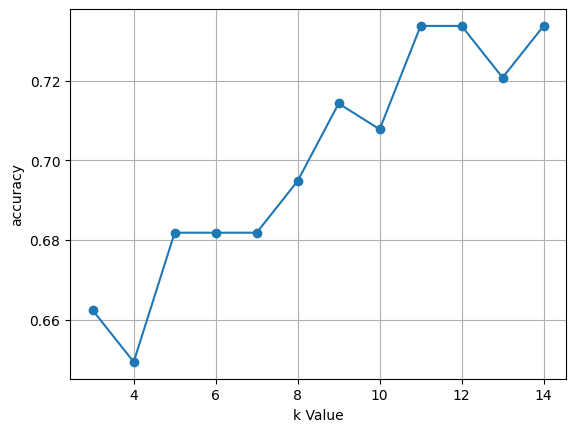

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=14,metric='manhattan')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred))
print('Recall is',recall_score(y_test,y_pred))
print('f1 score is',f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred)) 

Accuracy is 0.7337662337662337
Precision is 0.7122302158273381
Recall is 0.99
f1 score is 0.8284518828451883
[[14 40]
 [ 1 99]]


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred =dt_clf.predict(x_test)

In [ ]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is:  0.6363636363636364
[[23 31]
 [25 75]]


Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=rf_clf.predict(x_test)


In [ ]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is:  0.7402597402597403
[[21 33]
 [ 7 93]]


SVM

In [ ]:

from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred= svmclf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is: ', accuracy_score(y_test,y_pred))

Accuracy is:  0.7727272727272727


In [ ]:
#hyper parameter tuning
rf_clf = RandomForestClassifier(n_estimators=20,max_depth=3,criterion='entropy',min_samples_split=2)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=20)

In [ ]:
y_pred= rf_clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is:  0.7727272727272727
[[21 33]
 [ 2 98]]


**Test Data**

In [ ]:
ts_data=pd.read_csv('/content/test_lAUu6dG.csv')

In [ ]:
ts_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
ts_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


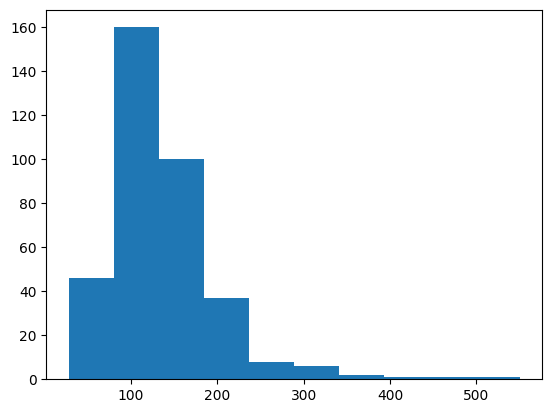

In [ ]:
plt.hist(ts_data['LoanAmount'])
plt.show()

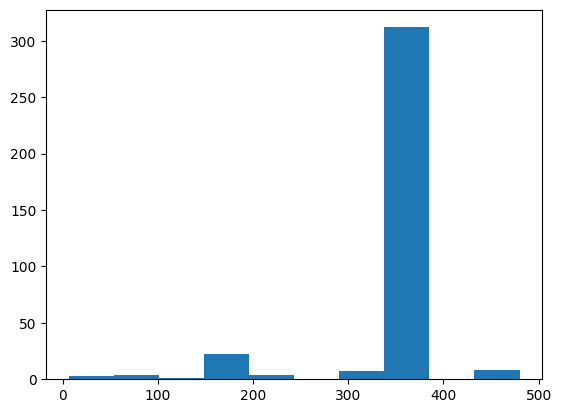

In [ ]:
plt.hist(ts_data['Loan_Amount_Term'])
plt.show()

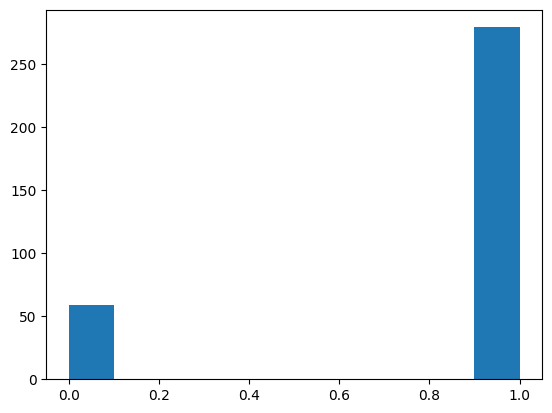

In [ ]:
plt.hist(ts_data['Credit_History'])
plt.show()

In [ ]:
ts_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
for i in['Gender','Dependents','Self_Employed']:
  ts_data[i]=ts_data[i].fillna(ts_data[i].mode)

In [ ]:
for i in['LoanAmount','Loan_Amount_Term','Credit_History']:
  ts_data[i]=ts_data[i].fillna(ts_data[i].median())

In [ ]:
ts_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
ts1_data=ts_data.drop('Loan_ID',axis=1)
ts1_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in ts1_data.columns:
  if ts1_data[col].dtype=='object':
    ts1_data[col]=label_encoder.fit_transform(ts1_data[col].astype(str))

In [ ]:
ts1_data.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [ ]:
ts1_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,2,1,0,0,1,5720,0,110.0,360.0,1.0,2
1,2,1,1,0,1,3076,1500,126.0,360.0,1.0,2
2,2,1,2,0,1,5000,1800,208.0,360.0,1.0,2
3,2,1,2,0,1,2340,2546,100.0,360.0,1.0,2
4,2,0,0,1,1,3276,0,78.0,360.0,1.0,2


<Axes: >

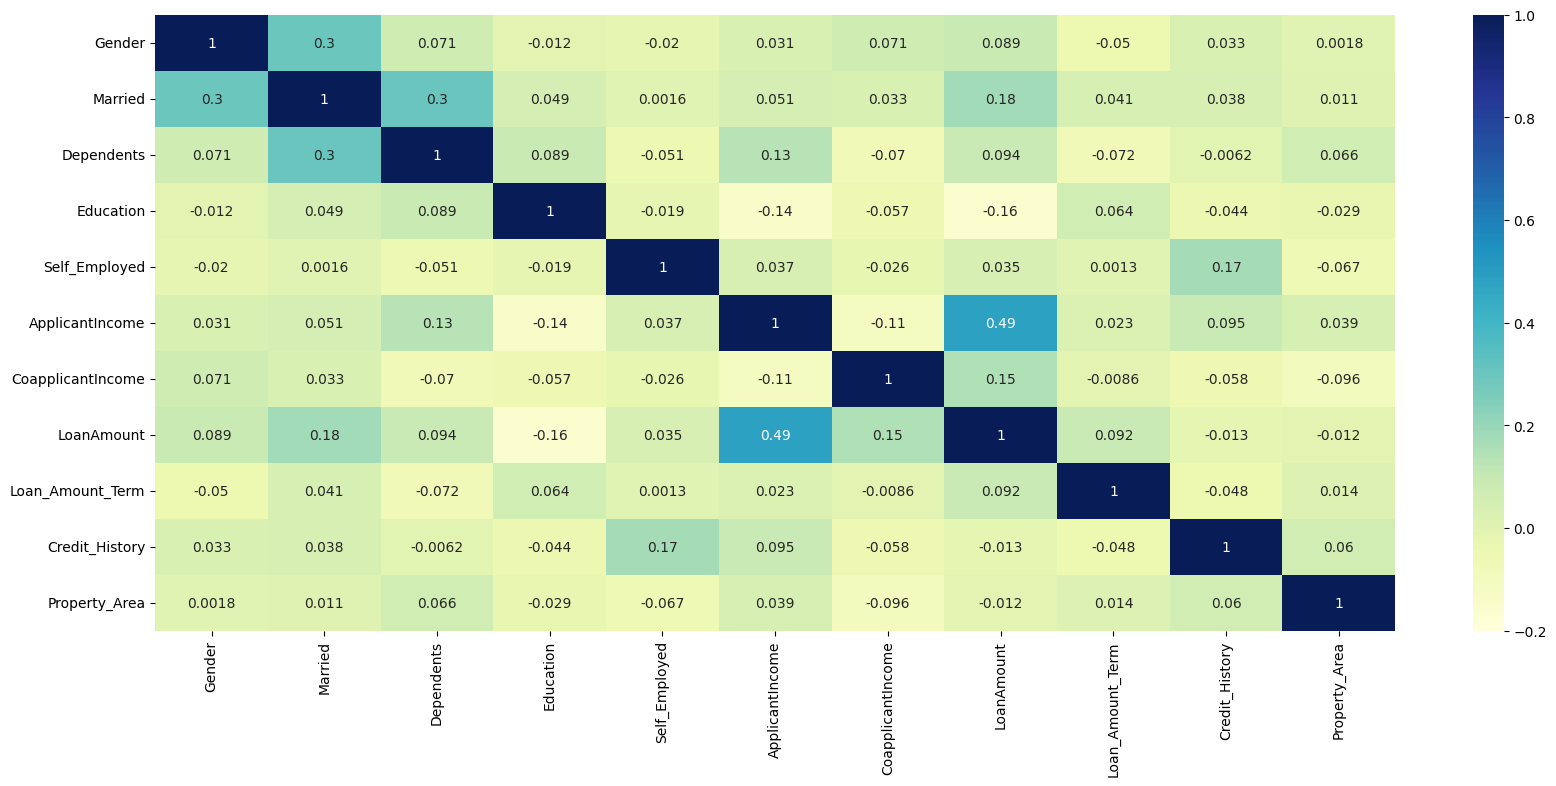

In [ ]:
corrmatrix=ts1_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmin=-0.2,vmax=1,cmap='YlGnBu')

In [ ]:
ts1_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,1.749319,0.634877,0.915531,0.228883,1.038147,4805.599455,1569.577657,135.980926,342.822888,0.839237,1.079019
std,0.498460,0.482122,1.176247,0.420687,0.403082,4910.685399,2334.232099,60.959739,64.658402,0.367814,0.824337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,1.000000,2864.000000,0.000000,101.000000,360.000000,1.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,1.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000,1.000000
75%,2.000000,1.000000,2.000000,0.000000,1.000000,5060.000000,2430.500000,157.500000,360.000000,1.000000,2.000000
max,2.000000,1.000000,4.000000,1.000000,2.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000,2.000000


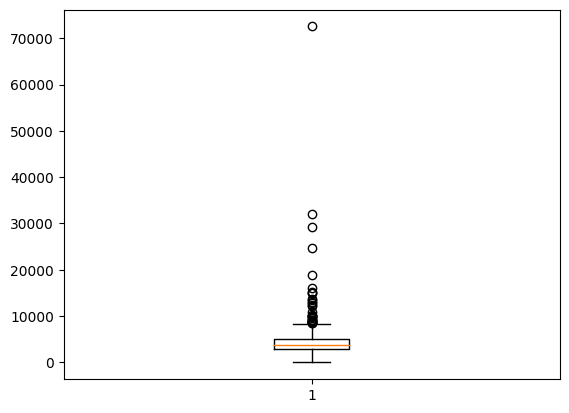

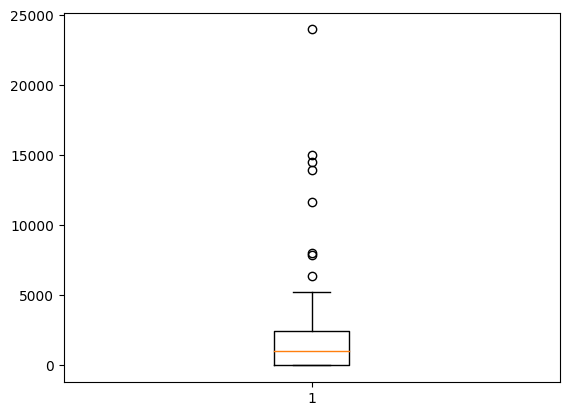

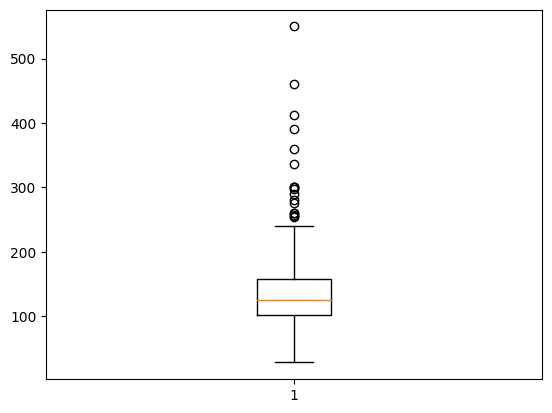

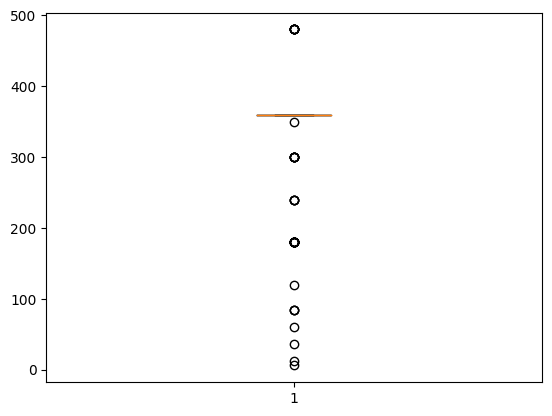

In [ ]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']:
  plt.boxplot(ts1_data[i])
  plt.show()

In [ ]:
def find_boundaries(df,variables):
  q1=df[variables].quantile(.25)
  q3=df[variables].quantile(.75)
  IQR=q3-q1
  lower_boundary=q1-1.5*IQR
  upper_boundary=q3+1.5*IQR
  return lower_boundary,upper_boundary

In [ ]:
lower_app,upper_app=find_boundaries(ts1_data,'ApplicantIncome')
print('upper Applicant is', upper_app)
print('lower Applicant is', lower_app)


upper Applicant is 8354.0
lower Applicant is -430.0


In [ ]:
ts1_data['ApplicantIncome']=np.where(ts1_data['ApplicantIncome']>upper_app,upper_app,np.where(ts1_data['ApplicantIncome']<lower_app,lower_app,ts1_data['ApplicantIncome']))

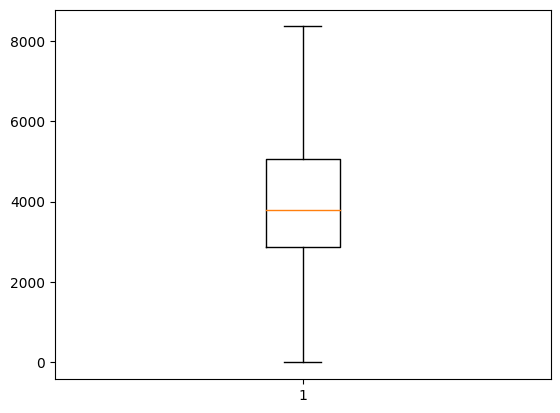

In [ ]:
plt.boxplot(ts1_data['ApplicantIncome'])
plt.show()

In [ ]:
ts1_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,2,1,0,0,1,5720.0,0,110.0,360.0,1.0,2
1,2,1,1,0,1,3076.0,1500,126.0,360.0,1.0,2
2,2,1,2,0,1,5000.0,1800,208.0,360.0,1.0,2
3,2,1,2,0,1,2340.0,2546,100.0,360.0,1.0,2
4,2,0,0,1,1,3276.0,0,78.0,360.0,1.0,2


In [ ]:
lower_Coapp,upper_Coapp=find_boundaries(ts1_data,'CoapplicantIncome')
print('upper Coapplicant is', upper_Coapp)
print('lower Coapplicant is', lower_Coapp)


upper Coapplicant is 6076.25
lower Coapplicant is -3645.75


In [ ]:
ts1_data['CoapplicantIncome']=np.where(ts1_data['CoapplicantIncome']>upper_Coapp,upper_Coapp,np.where(ts1_data['CoapplicantIncome']<lower_Coapp,lower_Coapp,ts1_data['CoapplicantIncome']))

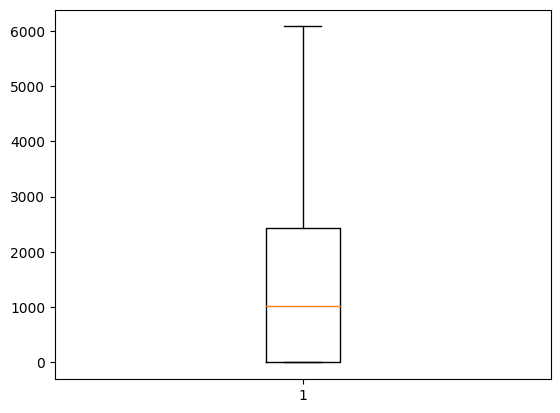

In [ ]:
plt.boxplot(ts1_data['CoapplicantIncome'])
plt.show()

In [ ]:
lower_loan,upper_loan=find_boundaries(ts1_data,'LoanAmount')
print('upper Loan is', upper_loan)
print('lower Loan is', lower_loan)


upper Loan is 242.25
lower Loan is 16.25


In [ ]:
ts1_data['LoanAmount']=np.where(ts1_data['LoanAmount']>upper_loan,upper_loan,np.where(ts1_data['LoanAmount']<lower_loan,lower_loan,ts1_data['LoanAmount']))

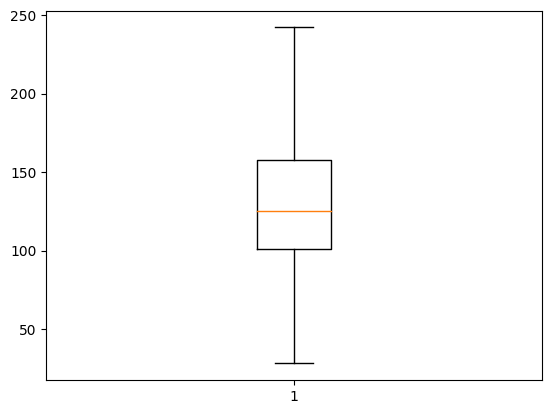

In [ ]:
plt.boxplot(ts1_data['LoanAmount'])
plt.show()

In [ ]:
lower_loan_term,upper_loan_term=find_boundaries(ts1_data,'Loan_Amount_Term')
print('upper Loan term is', upper_loan_term)
print('lower Loan term is', lower_loan_term)


upper Loan term is 360.0
lower Loan term is 360.0


In [ ]:
ts1_data['Loan_Amount_Term']=np.where(ts1_data['Loan_Amount_Term']>upper_loan_term,upper_loan_term,np.where(ts1_data['Loan_Amount_Term']<lower_loan_term,lower_loan_term,ts1_data['Loan_Amount_Term']))

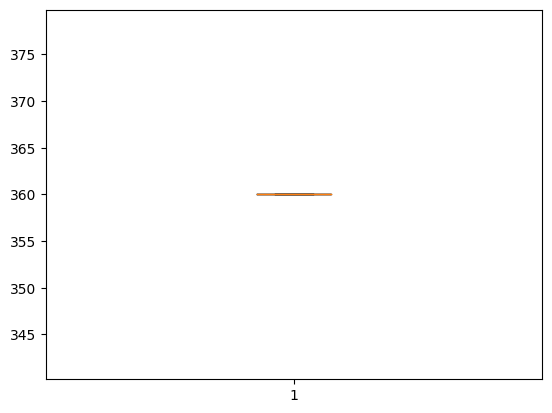

In [ ]:
plt.boxplot(ts1_data['Loan_Amount_Term'])
plt.show()

In [ ]:
ts1_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.0,367.000000,367.000000
mean,1.749319,0.634877,0.915531,0.228883,1.038147,4238.964578,1425.501362,131.957766,360.0,0.839237,1.079019
std,0.498460,0.482122,1.176247,0.420687,0.403082,1950.976357,1600.086250,46.926185,0.0,0.367814,0.824337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,360.0,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,1.000000,2864.000000,0.000000,101.000000,360.0,1.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,1.000000,3786.000000,1025.000000,125.000000,360.0,1.000000,1.000000
75%,2.000000,1.000000,2.000000,0.000000,1.000000,5060.000000,2430.500000,157.500000,360.0,1.000000,2.000000
max,2.000000,1.000000,4.000000,1.000000,2.000000,8354.000000,6076.250000,242.250000,360.0,1.000000,2.000000


In [ ]:
ts1_data.shape

(367, 11)

In [ ]:
ts1_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,2,1,0,0,1,5720.0,0.0,110.0,360.0,1.0,2
1,2,1,1,0,1,3076.0,1500.0,126.0,360.0,1.0,2
2,2,1,2,0,1,5000.0,1800.0,208.0,360.0,1.0,2
3,2,1,2,0,1,2340.0,2546.0,100.0,360.0,1.0,2
4,2,0,0,1,1,3276.0,0.0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,2,1,3,1,2,4009.0,1777.0,113.0,360.0,1.0,2
363,2,1,0,0,1,4158.0,709.0,115.0,360.0,1.0,2
364,2,0,0,0,1,3250.0,1993.0,126.0,360.0,1.0,1
365,2,1,0,0,1,5000.0,2393.0,158.0,360.0,1.0,0


In [ ]:
x= ts1_data.drop(['Gender','Married','Dependents',	'Education','Self_Employed','Loan_Amount_Term',	'Credit_History',	'Property_Area'],axis=1)

In [ ]:
x.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,367.000000,367.000000,367.000000
mean,4238.964578,1425.501362,131.957766
std,1950.976357,1600.086250,46.926185
min,0.000000,0.000000,28.000000
25%,2864.000000,0.000000,101.000000
50%,3786.000000,1025.000000,125.000000
75%,5060.000000,2430.500000,157.500000
max,8354.000000,6076.250000,242.250000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(0,1))
x = min_max_scaler.fit_transform(x)
x

array([[0.68470194, 0.        , 0.38273046],
       [0.36820685, 0.24686279, 0.45740957],
       [0.59851568, 0.29623534, 0.84014002],
       ...,
       [0.38903519, 0.32799835, 0.45740957],
       [0.59851568, 0.39382843, 0.60676779],
       [1.        , 0.        , 0.32672112]])

In [ ]:
x=pd.DataFrame(x,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'])

In [ ]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.684702,0.000000,0.382730
1,0.368207,0.246863,0.457410
2,0.598516,0.296235,0.840140
3,0.280105,0.419008,0.336056
4,0.392147,0.000000,0.233372
...,...,...,...
362,0.479890,0.292450,0.396733
363,0.497726,0.116684,0.406068
364,0.389035,0.327998,0.457410
365,0.598516,0.393828,0.606768


In [ ]:
x1=ts1_data.drop(['ApplicantIncome',	'CoapplicantIncome','LoanAmount'],axis=1)
x1

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,2,1,0,0,1,360.0,1.0,2
1,2,1,1,0,1,360.0,1.0,2
2,2,1,2,0,1,360.0,1.0,2
3,2,1,2,0,1,360.0,1.0,2
4,2,0,0,1,1,360.0,1.0,2
...,...,...,...,...,...,...,...,...
362,2,1,3,1,2,360.0,1.0,2
363,2,1,0,0,1,360.0,1.0,2
364,2,0,0,0,1,360.0,1.0,1
365,2,1,0,0,1,360.0,1.0,0


In [ ]:
x2=pd.concat([x1,x],axis=1)
x2

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount
0,2,1,0,0,1,360.0,1.0,2,0.684702,0.000000,0.382730
1,2,1,1,0,1,360.0,1.0,2,0.368207,0.246863,0.457410
2,2,1,2,0,1,360.0,1.0,2,0.598516,0.296235,0.840140
3,2,1,2,0,1,360.0,1.0,2,0.280105,0.419008,0.336056
4,2,0,0,1,1,360.0,1.0,2,0.392147,0.000000,0.233372
...,...,...,...,...,...,...,...,...,...,...,...
362,2,1,3,1,2,360.0,1.0,2,0.479890,0.292450,0.396733
363,2,1,0,0,1,360.0,1.0,2,0.497726,0.116684,0.406068
364,2,0,0,0,1,360.0,1.0,1,0.389035,0.327998,0.457410
365,2,1,0,0,1,360.0,1.0,0,0.598516,0.393828,0.606768


In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
lr_y_pred=logit_model.predict(x2)
lr_y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
Loan=pd.DataFrame(lr_y_pred,columns=['Loan_Status'])
Loan

,Loan_Status
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [ ]:
Loan['Loan_Status'].value_counts()

1    308
0     59
Name: Loan_Status, dtype: int64

In [ ]:
ts_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
l=ts_data.drop(['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',	'Credit_History','Property_Area'],axis=1)

In [ ]:
LG=pd.concat([l,Loan],axis=1)
LG

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [ ]:
LG['Loan_Status']=LG['Loan_Status'].replace({1:'Y',0:'N'})
LG['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In [ ]:
LG

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [ ]:
LG.to_csv('Logistic_pred.csv',index=False)

KNN

In [ ]:
classifier =KNeighborsClassifier(n_neighbors=k,metric='manhattan')
classifier.fit(x_train,y_train)
knn_y_pred=classifier.predict(x2)
    

In [ ]:
Loan_KNN=pd.DataFrame(knn_y_pred,columns=['Loan_Status'])


In [ ]:
Loan_KNN

,Loan_Status
0,1
1,1
2,1
3,1
4,0
...,...
362,1
363,1
364,1
365,1


In [ ]:
KNN=pd.concat([l,Loan_KNN],axis=1)
KNN

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [ ]:
KNN['Loan_Status']=KNN['Loan_Status'].replace({1:'Y',0:'N'})
KNN['Loan_Status'].value_counts()

Y    310
N     57
Name: Loan_Status, dtype: int64

In [ ]:
KNN.to_csv('KNN.csv',index=False)

Decision Tree

In [ ]:

dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
dc_y_pred =dt_clf.predict(x2)

In [ ]:
Loan_dc=pd.DataFrame(dc_y_pred,columns=['Loan_Status'])


In [ ]:
DT=pd.concat([l,Loan_dc],axis=1)
DT

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [ ]:
DT['Loan_Status']=DT['Loan_Status'].replace({1:'Y',0:'N'})
DT['Loan_Status'].value_counts()

Y    255
N    112
Name: Loan_Status, dtype: int64

In [ ]:
DT.to_csv('DT.csv',index=False)

Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)
rf_y_pred=rf_clf.predict(x2)


In [ ]:
Loan_rf=pd.DataFrame(rf_y_pred,columns=['Loan_Status'])


In [ ]:
RF=pd.concat([l,Loan_rf],axis=1)
RF

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [ ]:
RF['Loan_Status']=RF['Loan_Status'].replace({1:'Y',0:'N'})
RF['Loan_Status'].value_counts()

Y    292
N     75
Name: Loan_Status, dtype: int64

In [ ]:
RF.to_csv('RF.csv',index=False)

SVM

In [ ]:

from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)
svm_y_pred= svmclf.predict(x2)


In [ ]:
Loan_svm=pd.DataFrame(svm_y_pred,columns=['Loan_Status'])
SVM=pd.concat([l,Loan_svm],axis=1)

SVM['Loan_Status']=SVM['Loan_Status'].replace({1:'Y',0:'N'})
SVM['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In [ ]:
SVM.to_csv('SVM.csv',index=False)

Hyper parameter

In [ ]:

rf_clf = RandomForestClassifier(n_estimators=20,max_depth=3,criterion='entropy',min_samples_split=2)
rf_clf.fit(x_train,y_train)
hy_y_pred= rf_clf.predict(x2)


In [ ]:
Loan_hp=pd.DataFrame(hy_y_pred,columns=['Loan_Status'])
HP=pd.concat([l,Loan_hp],axis=1)

HP['Loan_Status']=HP['Loan_Status'].replace({1:'Y',0:'N'})
HP['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In [ ]:
HP.to_csv('HP.csv',index=False)